<a href="https://colab.research.google.com/github/Gab-Serrano/Inmersion-datos-pyton-Analisis-Mineduc/blob/main/Anaislis_datos_mineduc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis datos Mineduc

## Importación de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
matriculas_ed_superior = pd.read_csv('/content/drive/MyDrive/5. Proyectos/3. Curso Python - Datos/2. Proyecto Mineduc/20220719_Matrícula_Ed_Superior_2022_PUBL_MRUN.csv', sep = ';',encoding='utf-8')

In [ ]:
import pandas as pd
rendimiento_escolar_raw = pd.read_csv('/content/drive/MyDrive/5. Proyectos/3. Curso Python - Datos/2. Proyecto Mineduc/20230209_Rendimiento_2022_20230131_WEB.csv', sep = ';',encoding='utf-8')

<ipython-input-5-5beeb0da3955>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  rendimiento_escolar_raw = pd.read_csv('/content/drive/MyDrive/5. Proyectos/3. Curso Python - Datos/2. Proyecto Mineduc/20230209_Rendimiento_2022_20230131_WEB.csv', sep = ';',encoding='utf-8')


## Estudio Rendimiento Escolar

Base de datos `rendimiendo_escolar_raw`

### Análisis preliminar

In [ ]:
rendimiento_escolar_raw.shape

(3405130, 37)

In [ ]:
rendimiento_escolar_raw

In [103]:
rendimiento_escolar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405130 entries, 0 to 3405129
Data columns (total 37 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   AGNO            int64 
 1   RBD             int64 
 2   DGV_RBD         int64 
 3   NOM_RBD         object
 4   COD_REG_RBD     int64 
 5   NOM_REG_RBD_A   object
 6   COD_PRO_RBD     int64 
 7   COD_COM_RBD     int64 
 8   NOM_COM_RBD     object
 9   COD_DEPROV_RBD  int64 
 10  NOM_DEPROV_RBD  object
 11  COD_DEPE        int64 
 12  COD_DEPE2       int64 
 13  RURAL_RBD       int64 
 14  ESTADO_ESTAB    int64 
 15  COD_ENSE        int64 
 16  COD_ENSE2       int64 
 17  COD_GRADO       int64 
 18  LET_CUR         object
 19  COD_JOR         int64 
 20  COD_TIP_CUR     int64 
 21  COD_DES_CUR     int64 
 22  MRUN            int64 
 23  GEN_ALU         int64 
 24  FEC_NAC_ALU     int64 
 25  EDAD_ALU        object
 26  COD_REG_ALU     int64 
 27  COD_COM_ALU     int64 
 28  NOM_COM_ALU     object
 29  COD_RAMA      

In [70]:
rdmnt_esc = rendimiento_escolar_raw[((rendimiento_escolar_raw['SIT_FIN_R'] == 'P') | 
                                     (rendimiento_escolar_raw['SIT_FIN_R'] == 'R')) &
                                    ((rendimiento_escolar_raw['COD_DEPE2'] >= 1) & (rendimiento_escolar_raw['COD_DEPE2'] <= 3)) & 
                                    ((rendimiento_escolar_raw['GEN_ALU'] >= 1) & (rendimiento_escolar_raw['GEN_ALU'] <= 2))][['NOM_RBD','NOM_REG_RBD_A', 'NOM_COM_RBD', 'COD_DEPE2', 'RURAL_RBD', 'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'MRUN', 'GEN_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'NOM_COM_ALU', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN_R' ]]
rdmnt_esc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894334 entries, 16485 to 3405088
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   NOM_RBD        object
 1   NOM_REG_RBD_A  object
 2   NOM_COM_RBD    object
 3   COD_DEPE2      int64 
 4   RURAL_RBD      int64 
 5   COD_ENSE2      int64 
 6   COD_GRADO      int64 
 7   COD_JOR        int64 
 8   MRUN           int64 
 9   GEN_ALU        int64 
 10  EDAD_ALU       object
 11  COD_REG_ALU    int64 
 12  NOM_COM_ALU    object
 13  PROM_GRAL      object
 14  ASISTENCIA     int64 
 15  SIT_FIN_R      object
dtypes: int64(9), object(7)
memory usage: 375.4+ MB


In [71]:
dic_rdmnt_esc = {
       'NOM_RBD':'NOMBRE_COLE',
       'NOM_REG_RBD_A':'COD_REGION_COLE',
       'NOM_COM_RBD':'NOM_COMUNA_COLE', 
       'COD_DEPE2':'DEPENDENCIA', 
       'RURAL_RBD':'INDICE_RURAL',
       'COD_ENSE2':'TIPO_ENSE',
       'COD_GRADO':'NIVEL_EDUC', 
       'COD_JOR':'JORNADA',  
       'MRUN':'COD_RUN',
       'GEN_ALU':'GENERO_ESTU',
       'EDAD_ALU':'EDAD_ESTU', 
       'COD_REG_ALU':'COD_REGION_ESTU', 
       'NOM_COM_ALU':'NOM_COMUNA_ESTU', 
       'PROM_GRAL':'PROM_GRAL_ESTU', 
       'ASISTENCIA':'ASISTENCIA_ESTU',  
       'SIT_FIN_R':'SIT_FINAL_ESTU',
       }

rdmnt_esc = rdmnt_esc.rename(columns=dic_rdmnt_esc)
rdmnt_esc.columns

Index(['NOMBRE_COLE', 'COD_REGION_COLE', 'NOM_COMUNA_COLE', 'DEPENDENCIA',
       'INDICE_RURAL', 'TIPO_ENSE', 'NIVEL_EDUC', 'JORNADA', 'COD_RUN',
       'GENERO_ESTU', 'EDAD_ESTU', 'COD_REGION_ESTU', 'NOM_COMUNA_ESTU',
       'PROM_GRAL_ESTU', 'ASISTENCIA_ESTU', 'SIT_FINAL_ESTU'],
      dtype='object')

In [72]:
rdmnt_esc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894334 entries, 16485 to 3405088
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   NOMBRE_COLE      object
 1   COD_REGION_COLE  object
 2   NOM_COMUNA_COLE  object
 3   DEPENDENCIA      int64 
 4   INDICE_RURAL     int64 
 5   TIPO_ENSE        int64 
 6   NIVEL_EDUC       int64 
 7   JORNADA          int64 
 8   COD_RUN          int64 
 9   GENERO_ESTU      int64 
 10  EDAD_ESTU        object
 11  COD_REGION_ESTU  int64 
 12  NOM_COMUNA_ESTU  object
 13  PROM_GRAL_ESTU   object
 14  ASISTENCIA_ESTU  int64 
 15  SIT_FINAL_ESTU   object
dtypes: int64(9), object(7)
memory usage: 375.4+ MB


In [73]:
rdmnt_esc.head(3)

,NOMBRE_COLE,COD_REGION_COLE,NOM_COMUNA_COLE,DEPENDENCIA,INDICE_RURAL,TIPO_ENSE,NIVEL_EDUC,JORNADA,COD_RUN,GENERO_ESTU,EDAD_ESTU,COD_REGION_ESTU,NOM_COMUNA_ESTU,PROM_GRAL_ESTU,ASISTENCIA_ESTU,SIT_FINAL_ESTU
16485,COLEGIO ITALIANO SANTA ANA,AYP,ARICA,2,0,2,1,3,4259380,2,7,13,SAN RAMÓN,"6,8",95,P
16486,COLEGIO ITALIANO SANTA ANA,AYP,ARICA,2,0,2,1,3,10762036,2,7,13,SANTIAGO,"6,7",85,P
16487,COLEGIO ITALIANO SANTA ANA,AYP,ARICA,2,0,2,1,3,12992982,2,7,15,ARICA,"6,7",98,P


In [74]:
rdmnt_esc['PROM_GRAL_ESTU'] = rdmnt_esc['PROM_GRAL_ESTU'].str.replace(',', '.').astype(float)

In [86]:
rdmnt_esc_depend_prom_simple = rdmnt_esc.groupby(['DEPENDENCIA'])[['PROM_GRAL_ESTU', 'ASISTENCIA_ESTU']].mean()
rdmnt_esc_depend_prom_simple

,PROM_GRAL_ESTU,ASISTENCIA_ESTU
DEPENDENCIA,,
1,5.957458,86.606402
2,6.010135,88.218036
3,6.365011,92.659640


In [ ]:
rdmnt_esc_depend_prom = rdmnt_esc.groupby(['INDICE_RURAL','TIPO_ENSE','COD_REGION_COLE','DEPENDENCIA','GENERO_ESTU'])[['PROM_GRAL_ESTU', 'ASISTENCIA_ESTU']].mean()
rdmnt_esc_depend_prom

In [61]:
rdmnt_esc_reg_prom = rdmnt_esc.groupby('COD_REGION_COLE')[['PROM_GRAL_ESTU', 'ASISTENCIA_ESTU']].mean().round(3)
rdmnt_esc_reg_prom.loc[] 

,PROM_GRAL_ESTU,ASISTENCIA_ESTU
COD_REGION_COLE,,
ANTOF,6.037,88.082
ARAUC,6.001,89.671
ATCMA,6.145,87.100
AYP,6.137,87.650
AYSEN,5.919,86.028
BBIO,6.090,88.197
COQ,6.022,87.620
LAGOS,5.977,87.907
LGBO,6.036,89.197


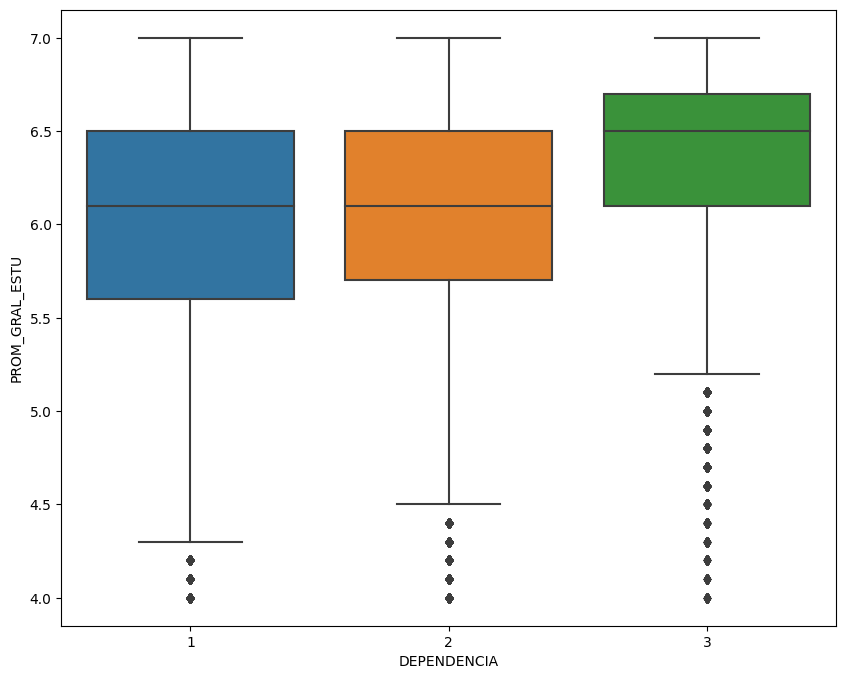

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

rdmnt_esc_filt = rdmnt_esc.query('PROM_GRAL_ESTU >= 4 and PROM_GRAL_ESTU <= 7')
plt.figure(figsize=(10,8))
sns.boxplot(data=rdmnt_esc_filt, x='DEPENDENCIA', y ='PROM_GRAL_ESTU')
plt.show()

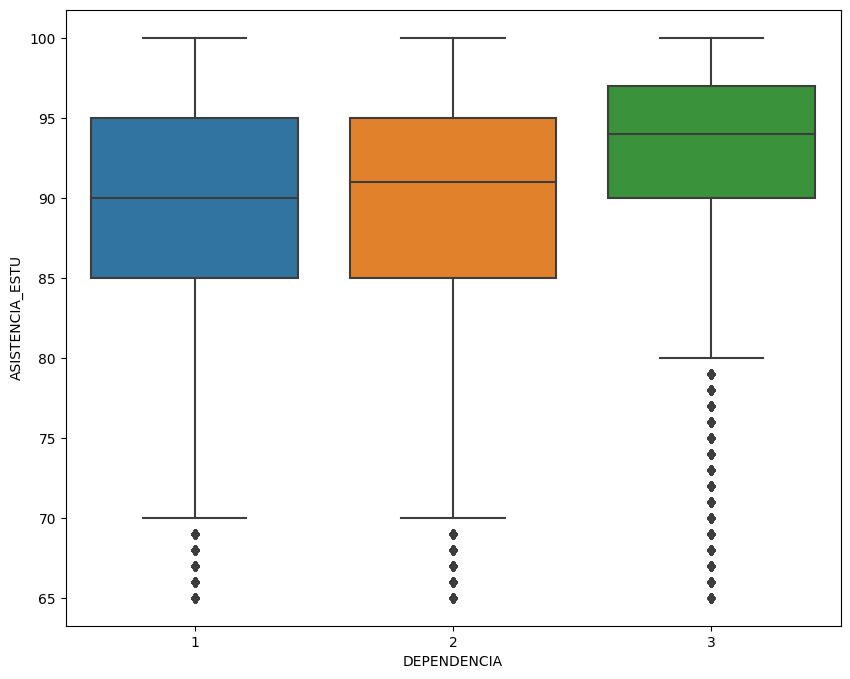

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

rdmnt_esc_filt = rdmnt_esc.query('ASISTENCIA_ESTU >= 5 and PROM_GRAL_ESTU <= 100')
plt.figure(figsize=(10,8))
sns.boxplot(data=rdmnt_esc_filt, x='DEPENDENCIA', y ='ASISTENCIA_ESTU')
plt.show()

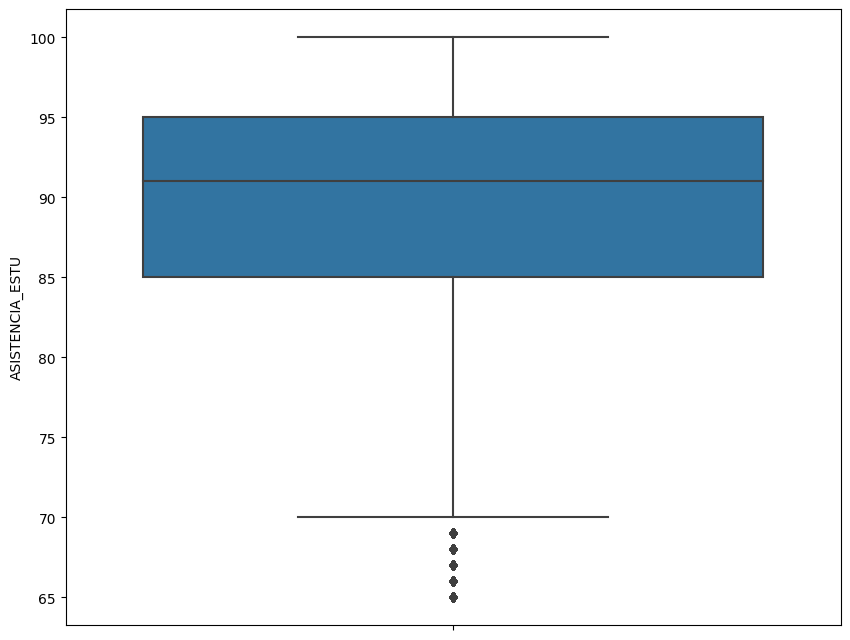

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

rdmnt_esc_filt = rdmnt_esc.query('ASISTENCIA_ESTU >= 65')
plt.figure(figsize=(10,8))
sns.boxplot(data=rdmnt_esc_filt, y ='ASISTENCIA_ESTU')
plt.show()

In [105]:
rdmnt_esc.corr()

,DEPENDENCIA,INDICE_RURAL,TIPO_ENSE,NIVEL_EDUC,JORNADA,COD_RUN,GENERO_ESTU,COD_REGION_ESTU,PROM_GRAL_ESTU,ASISTENCIA_ESTU
DEPENDENCIA,1.000000,-0.211237,-0.034789,-0.019220,-0.090285,-0.043668,0.016544,0.095726,0.135535,0.138718
INDICE_RURAL,-0.211237,1.000000,-0.098743,0.040373,0.081373,-0.004984,-0.012145,-0.039246,0.024580,0.036392
TIPO_ENSE,-0.034789,-0.098743,1.000000,-0.416816,0.135113,-0.076778,0.000680,-0.020365,-0.263756,-0.038797
NIVEL_EDUC,-0.019220,0.040373,-0.416816,1.000000,0.008345,-0.128674,-0.000921,-0.010068,-0.054180,0.075232
JORNADA,-0.090285,0.081373,0.135113,0.008345,1.000000,-0.028827,-0.000782,0.018612,-0.091773,-0.007505
COD_RUN,-0.043668,-0.004984,-0.076778,-0.128674,-0.028827,1.000000,-0.007832,0.011675,0.054758,-0.018636
GENERO_ESTU,0.016544,-0.012145,0.000680,-0.000921,-0.000782,-0.007832,1.000000,-0.001170,0.116022,0.011515
COD_REGION_ESTU,0.095726,-0.039246,-0.020365,-0.010068,0.018612,0.011675,-0.001170,1.000000,-0.009477,-0.013653
PROM_GRAL_ESTU,0.135535,0.024580,-0.263756,-0.054180,-0.091773,0.054758,0.116022,-0.009477,1.000000,0.355420
ASISTENCIA_ESTU,0.138718,0.036392,-0.038797,0.075232,-0.007505,-0.018636,0.011515,-0.013653,0.355420,1.000000


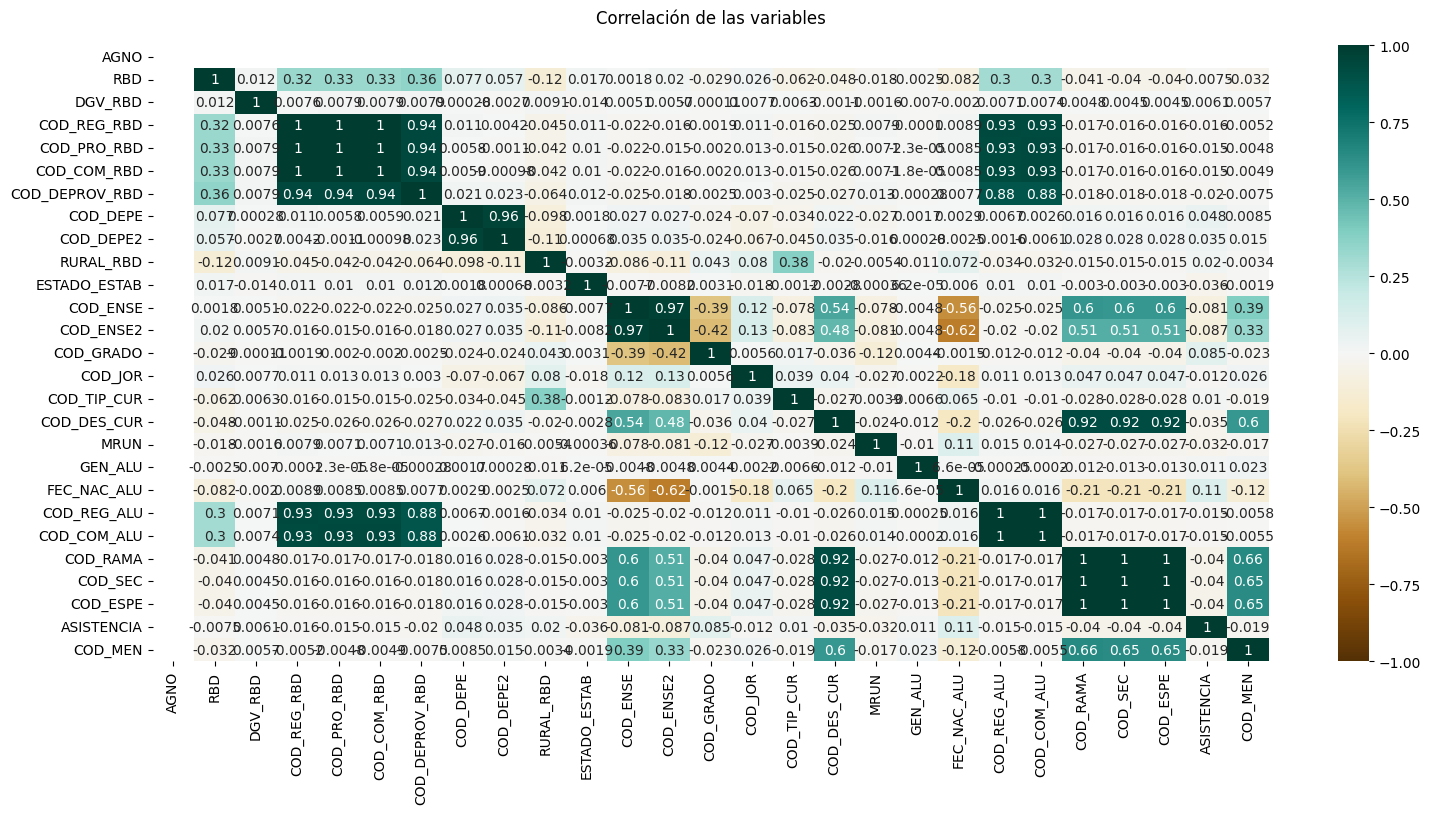

In [106]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(rendimiento_escolar_raw.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':12}, pad=16);

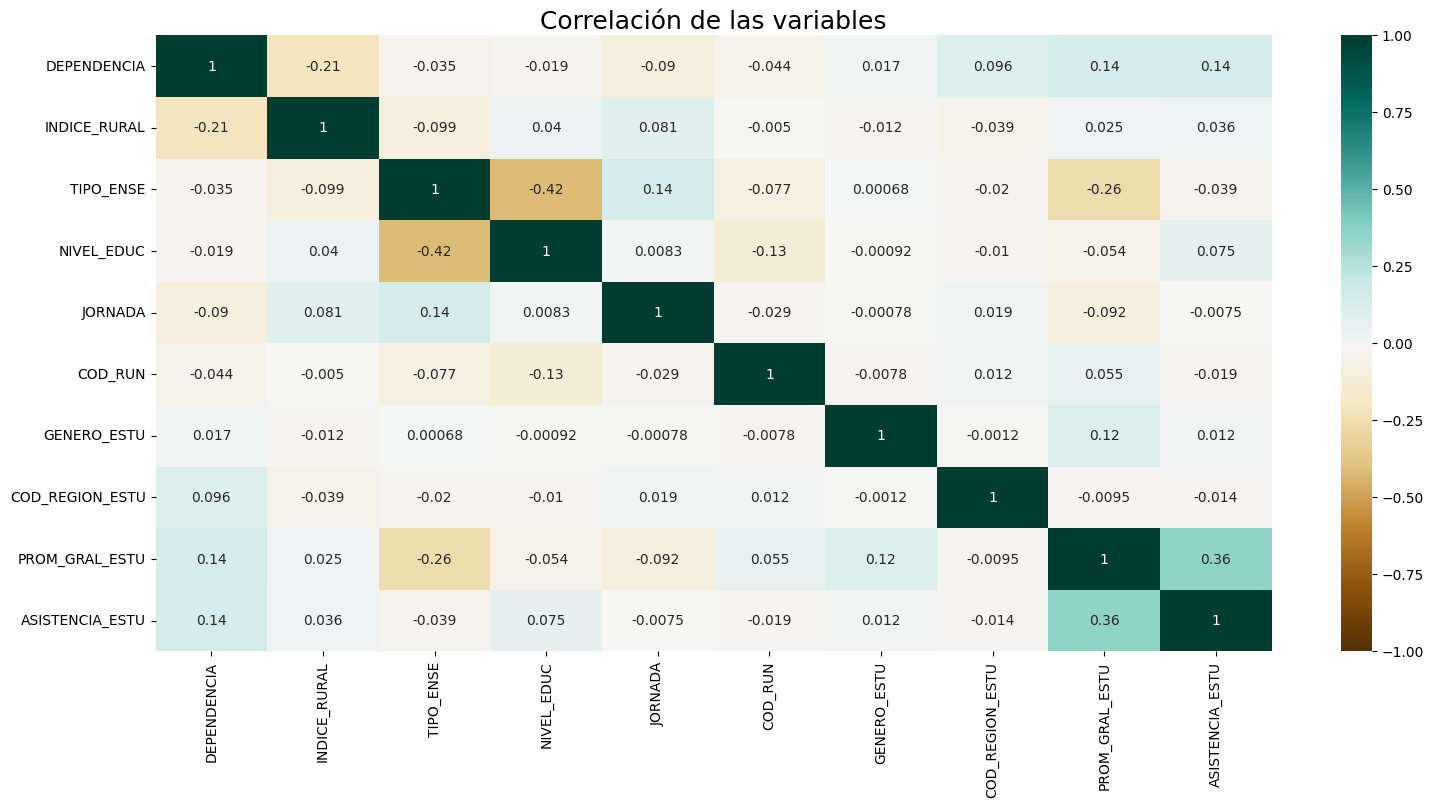

In [159]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(rdmnt_esc.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=5);

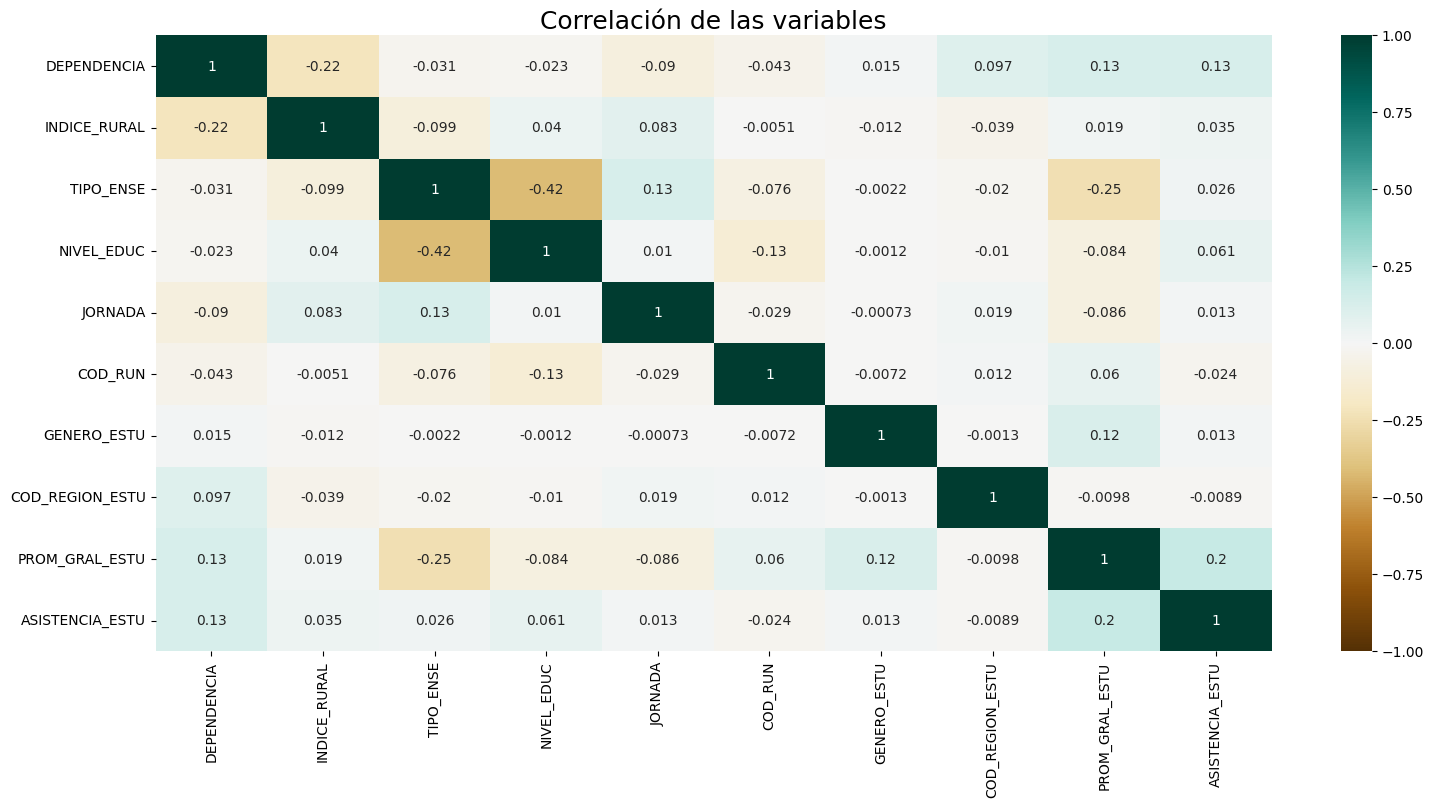

In [160]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(rdmnt_esc_filt.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=5);

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = rdmnt_esc[['ASISTENCIA_ESTU']]
y = rdmnt_esc['PROM_GRAL_ESTU']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=99)

In [137]:
X_train

,ASISTENCIA_ESTU
663849,90
1511536,85
1151641,97
438648,90
600414,86
...,...
2239450,83
1041955,89
3356439,100
1560832,96


In [138]:
X_test

,ASISTENCIA_ESTU
2871644,79
232160,88
2450411,90
2681034,87
361820,94
...,...
1204887,100
2799753,100
1204984,100
2049583,85


In [139]:
y_train

663849     6.9
1511536    5.7
1151641    5.7
438648     6.6
600414     5.4
          ... 
2239450    5.5
1041955    5.1
3356439    5.6
1560832    6.6
2098780    5.9
Name: PROM_GRAL_ESTU, Length: 2170750, dtype: float64

In [140]:
y_test

2871644    5.6
232160     6.4
2450411    6.7
2681034    6.2
361820     6.9
          ... 
1204887    6.5
2799753    5.4
1204984    5.2
2049583    6.5
3036802    6.2
Name: PROM_GRAL_ESTU, Length: 723584, dtype: float64

In [141]:
modelo = LinearRegression()

In [142]:
modelo.fit(X_train,y_train)

LinearRegression()

In [143]:
y_predict_test = modelo.predict(X_test)

In [144]:
from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_r2 = r2_score(y_test, y_predict_test)
print(baseline_mae,baseline_r2)

0.490379302684202 0.1262293720561305


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = rdmnt_esc[['ASISTENCIA_ESTU', 'GENERO_ESTU', 'INDICE_RURAL', 'DEPENDENCIA', 'NIVEL_EDUC', 'COD_REGION_ESTU' ]]
y = rdmnt_esc['PROM_GRAL_ESTU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

0.4773786537848709 0.1538046611451378
0.47801964150961723 0.15364699907755486


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = rdmnt_esc[['PROM_GRAL_ESTU', 'GENERO_ESTU', 'INDICE_RURAL', 'DEPENDENCIA', 'NIVEL_EDUC', 'COD_REGION_ESTU' ]]
y = rdmnt_esc['ASISTENCIA_ESTU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

7.1882271530245925 0.14676408859861456
7.18763331825006 0.14714260105501287


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = rdmnt_esc_filt[['PROM_GRAL_ESTU', 'GENERO_ESTU', 'INDICE_RURAL', 'DEPENDENCIA', 'NIVEL_EDUC', 'COD_REGION_ESTU', 'TIPO_ENSE', 'JORNADA' ]]
y = rdmnt_esc_filt['ASISTENCIA_ESTU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

5.694739225581726 0.07818106477350595
5.690630820872116 0.0785702091241659


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = rdmnt_esc_filt[['ASISTENCIA_ESTU', 'GENERO_ESTU', 'INDICE_RURAL', 'DEPENDENCIA', 'NIVEL_EDUC', 'COD_REGION_ESTU', 'TIPO_ENSE', 'JORNADA' ]]
y = rdmnt_esc_filt['PROM_GRAL_ESTU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

0.43050462542390244 0.17649579365921564
0.4303297345198863 0.17611582038302365


In [168]:
modelo_1.predict([[90,1,0,3,1,13,5,3]]) #Estudiante privado hombre alta asistencia

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.02902569])

In [172]:
modelo_1.predict([[90,1,1,1,1,13,5,3]]) #Estudinate municipal rural hombre alta asistencia

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.8811035])

In [173]:
modelo_1.predict([[90,1,0,1,1,13,5,3]]) #Estudinate municipal hombre alta asistencia

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.86032819])

In [174]:
modelo_1.predict([[70,1,0,3,1,13,5,3]]) #Estudiante privado hombre baja asistencia

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.67999453])

In [175]:
modelo_1.predict([[70,1,1,1,1,13,5,3]]) #Estudinate municipal rural hombre baja asistencia

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.53207234])

In [176]:
modelo_1.predict([[70,1,0,1,1,13,5,3]]) #Estudinate municipal hombre baja asistencia

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.51129703])